4.4 RNN층 구현
4.4.1 RNN층 클래스

In [2]:
import numpy as np

# -- RNN층 --
class SimpleRNNLayer:
    def __init__(self, n_upper, n):
        # 파라미터 초깃값 설정
        self.w = np.random.randn(n_upper, n) / np.sqrt(n_upper)
        self.v = np.random.randn(n,n) / np.sqrt(n)
        self.b = np.zeros(n)
        
    def forward(self, x, y_prev):    # y_prev: 이전 시점의 출력
        u = np.dot(x, self.w) + np.dot(y_prev, self.v) + self.b
        self.y = np.tanh(u)          # 출력
        
    def backward(self, x, y, y_prev, grad_y):
        delta = grad_y * (1 - y**2)
        
        # 각 기울기
        self.grad_w += np.dot(x.T, delta)
        self.grad_v += np.dot(y_prev.T, delta)
        self.grad_b += np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        self.grad_y_prev = np.dot(delta, self.v.T)
        
    def rest_sum_grad(self):
        self.grad_w = np.zeros_like(self.w)
        self.grad_v = np.zeros_like(self.v)
        self.grad_b = np.zeros_like(self.b)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.v -= eta * self.grad_v
        self.b -= eta * self.grad_b

4.5 간단한 구조의 RNN 구현
4.5.1 훈련 데이터 생성

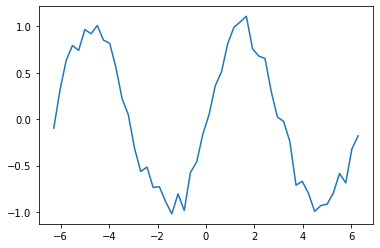

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sin_x = np.linspace(-2*np.pi, 2*np.pi)    # -2*pi에서 2*pi까지
# sin 함수에 무작위로 노이즈 생성하기
sin_y = np.sin(sin_x) + 0.1*np.random.randn(len(sin_x))

plt.plot(sin_x, sin_y)
plt.show()

4.5.2 데이터 전처리

In [9]:
n_sample = len(sin_x)-n_time                      # 샘플 수
input_data = np.zeros((n_sample, n_time, n_in))   # 입력
correct_data = np.zeros((n_sample, n_out))        # 정답
for i in range(0, n_sample):
    input_data[i] = sin_y[i:i+n_time].reshape(-1, 1)
    # 정답은 입력값 바로 다음 시점의 값
    correct_data[i] = sin_y[i+n_time+1]

NameError: name 'n_time' is not defined

4.5.3 훈련

In [ ]:
rnn_layer = SimpleRNNLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 훈련 --
def train(x_mb, t_mb):
    # 순전파 RNN층
    y_rnn = np.zeros((len(x_mb), n_time+1, n_mid))
    y_prev = y_rnn[:, 0, :]
    for i in range(n_time):
        x = x_mb[:, i, :]
        rnn_layer.forward(x, y_prev)
        y = rnn_layer.y
        y_rnn[:,i+1,:] = y
        y_prev = y
        
    # 순전파 출력층
    output_layer.forward(y)
    
    # 역전파 출력층
    output_layer.backward(t_mb)
    grad_y = output_layer.grad_x
    
    # 역전파 RNN층
    rnn_layer.rest_sum_grad()
    for i in reversed(range(n_time)):
        x = x_mb[:, i, :]
        y = y_rnn[:, i+1, :]
        y_prev = y_rnn[:, i, :]
        rnn_layer.backward(x, y, y_prev, grad_y)
        grad_y = rnn_layer.grad_y_prev
        
    # 파라미터 갱신
    rnn_layer.update(eta)
    output_layer.update(eta)

4.5.4 예측

In [ ]:
def predict(x_mb):
    # 순전파 RNN층
    y_prev = np.zeros((len(x_mb), n_mid))
    for i in range(n_time):
        x = x_mb[:, i, :]
        rnn_layer.forward(x, y_prev)
        y = rnn_layer.y
        y_prev = y
        
    # 순전파 출력층
    output_layer.forward(y)
    return output_layer.y

4.5.5. 곡선 생성

In [10]:
predicted = input_data[0].reshape(-1).tolist()    # 최초 입력
for i in range(n_sample):
    # 입력은 다음 시점 시계열 데이터
    x = np.array(predicted[-n_time:]).reshape(1, n_time, 1)
    y = predict(x)
    predicted.append(float(y[0, 0]))               # 출력을 predicted에 추가
    
plt.plot(range(len(sin_y)), sin_y.tolist(), label="Correct")
plt.plot(range(len(predicted)), predicted, label="Predicted")
plt.legend()
plt.show()

NameError: name 'input_data' is not defined